In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length','sepal width','petal length','petal width','label']
    data = np.array(df.iloc[:100,[0,1,-1]])
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

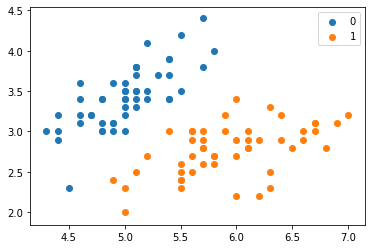

In [5]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [ ]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel
    
    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = feature
        self.Y = labels
        self.b = 0.0
        
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        
        self.C = 1.0
        
    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1
        
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r
    
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1) ** 2
        return 0
    
    def _E(self, i):
        return self._g(i) - self.Y[i]
    
    def _init_alpha(self):
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)
        
        for i in index_list:
            if self._KKT(i):
                continue
            E1 = self.E(i)
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j
        
    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha
        
    def fit(self, features, labels):
        self.init_args(features, labels)
        
        for t in range(self.max_iter):
            i1, i2 = self._init_alpha()
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1]+self.alpha[i2]-self.C)
                H = min(self.C, self.alpha[i1]+self.alpha[i2])
            else:
                L = max(0, self.alpha[i2]-self.alpha[i1])
                H = min(self.C, self.C+self.alpha[i2]-self.alpha[i1])
            E1 = self.E[i1]
            E2 = self.E[i2]
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(self.X[i2], self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                continue
                
            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (E1 - E2) / eta
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (self.alpha[i2] - alpha2_new)
            
            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b
            
            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                b_new = (b1_new + b2_new) / 2
                
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new
            
            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
            
        return 'train done !'
    
    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] + self.kernel(data, self.X[i])
            
        return 1 if r > 0 else -1
    
    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)
    
    def _weight(self):
        yx = self.Y.reshape(-1,1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [ ]:
svm = SVM(max_iter=200)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

In [6]:
from sklearn.svm import SVC

In [7]:
clf = SVC()
clf.fit(X_train, y_train)

D:\anaconda3-2019-10\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
clf.score(X_test, y_test)

1.0